In [1]:
#EDA (Exploratory data analysis)

In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
from pysentimiento.preprocessing import preprocess_tweet

2024-03-19 22:05:26.408618: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 22:05:26.598181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 22:05:26.598251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 22:05:26.629189: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 22:05:26.694827: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [5]:
#Helper Functions

In [6]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [7]:
#Read Data

In [8]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv', 'data/raw_dataset-02.csv', 'data/raw_dataset-03.csv', 'data/raw_dataset-04.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11276 entries, 0 to 11275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11276 non-null  object
 1   label   11276 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.3+ KB


In [9]:
import re
from typing import Union, List
import string

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

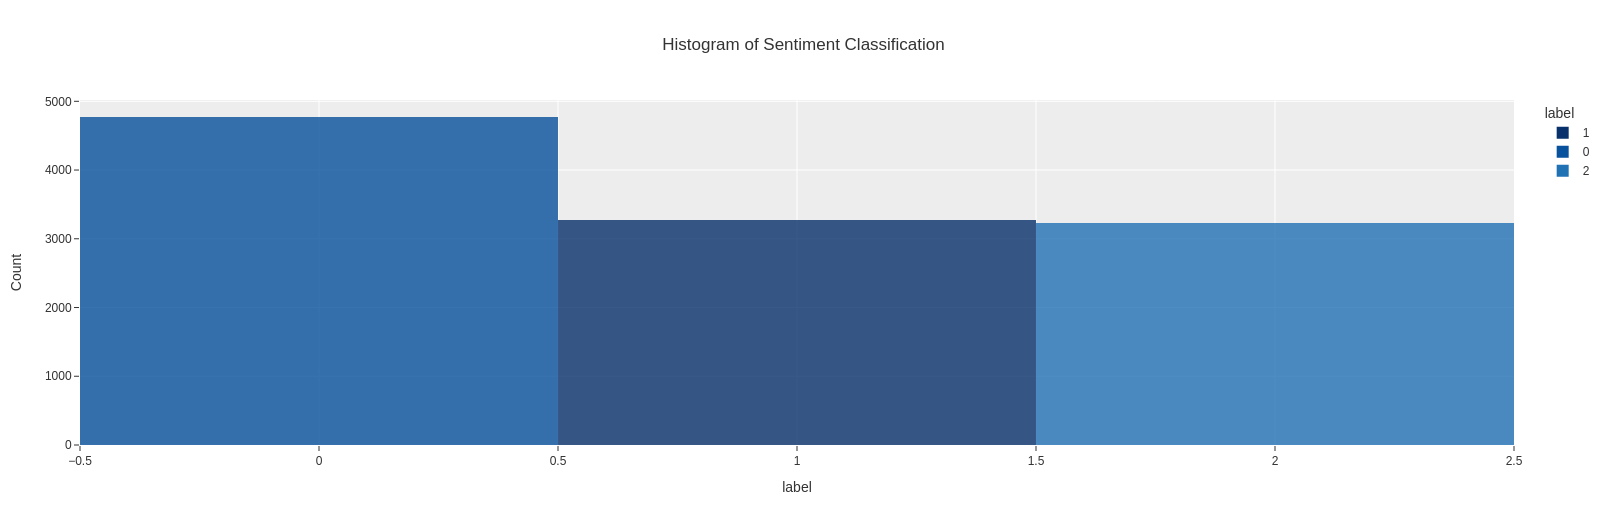

In [10]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [11]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [12]:
# clean text, lowercase and remove punk
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x, demoji=False))

In [13]:
df.head()

text  label label_name
0    Oe Chacal      1    Neutral
1    Anda vete      0   Negative
2   a la firme      1    Neutral
3   Chau, cojo      0   Negative
4  Tengo plata      1    Neutral

In [14]:
df.sample(n = 30)

text  label label_name
3306   En clima de Lima es templado, no es frío 🤦🏼🤦🏼🤦...      1    Neutral
5399   Hola chinito 👋👋, que cochino para comer ese go...      0   Negative
222                              El panetón es bien rico      2   Positive
3                                             Chau, cojo      0   Negative
1263   Mala defensa de la chica Yenifer. Ya hubiera c...      1    Neutral
891    ¿Conoce ese refrán? "Quien con mocosos se acuesta      1    Neutral
8170   ASÍ ES BETO SE LOS DIJISTE A ESTOS QUE APOYABA...      0   Negative
8446                 El mariachi loco quiere bailar... 🕺      1    Neutral
2773            Bien Lucas siguiendo los pasos del Papa😇      2   Positive
81                                      A mí qué chucha      0   Negative
4973           Sus brazos parecen 2 piernas de chancho 🤣      0   Negative
6920   Prosor yo quiero una guia heraldo para bajar g...      1    Neutral
3339   Es muy que lógico pensar en la necesidad de po...      1    Neutral
7495   *QUIEN A MANEJADO, SABES? >:V, QUIEN A MANEJAD...      0   Negative
8284   Bueno la verdad es que son super buenos, que g...      2   Positive
10729  Q hace con lo q gana🤔 no puedes comparte un.pa...      2   Positive
6369                            Que rico 🤤 los tamalitos      2   Positive
9395   Seria bueno que se lo dijeras a todas las auto...      0   Negative
2117   Como extraño el calor ,la lluvia el olor a tie...      1    Neutral
3770   No hay ninguna ley en Perú  que prohíba o este...      0   Negative
9514   No hay nada que hacer, con Carlos Álvarez a ca...      2   Positive
2535   El chat: y el ravage?  El huskar con bkb: jaja...      0   Negative
10776  LOS CONGRESISTAS CORRUPTOS 😡 QUIEREN BAJARSE A...      0   Negative
8400       El pollo creció y fue líder de la trinchera 😂      1    Neutral
2528              Ricardo Sono extraño el pan con pavo ️      1    Neutral
10882  Felicidades Yidda Eslava, quien te conoció en ...      2   Positive
3870   No conozco a éste cabrón, pero muy bien dicho ...      0   Negative
4032   Ojalá no te chupes Spencer, DENÚNCIALOS así en...      1    Neutral
2374   Abugatás rojete CONVENIDO "sabes bien que el a...      0   Negative
5371                   Aceite a la cintura d la chata! 😂      0   Negative

In [15]:
#Visualizations

In [16]:
#Word Cloud

In [17]:
from wordcloud import WordCloud


In [18]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [60]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", "jjaja"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


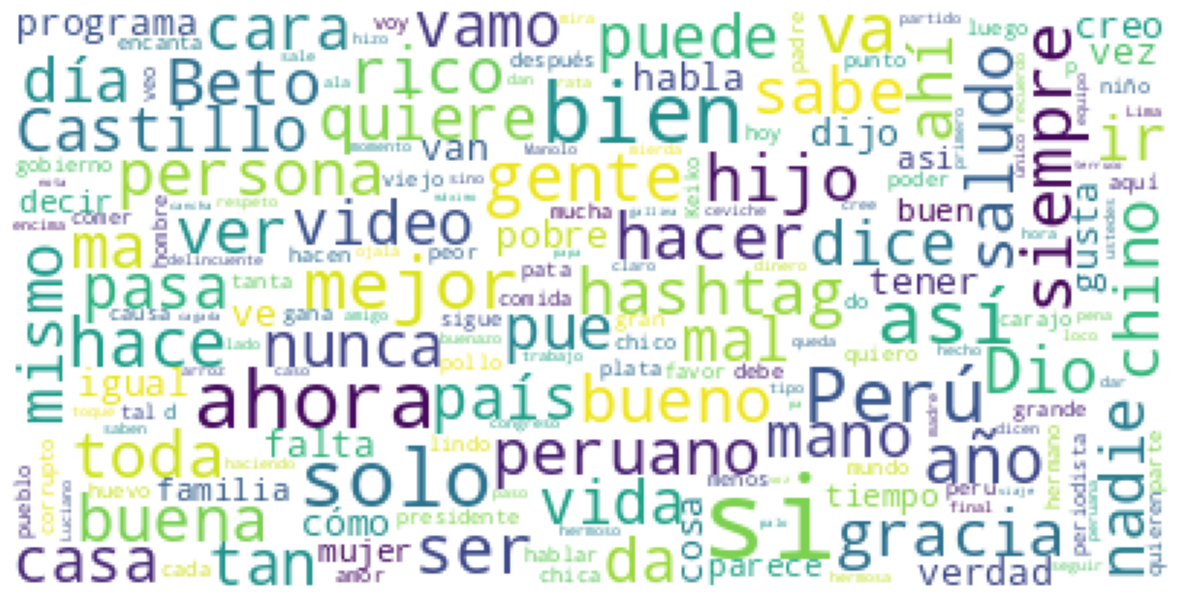

In [61]:
show_wordcloud(df["text"].values)

In [21]:
#Target Count

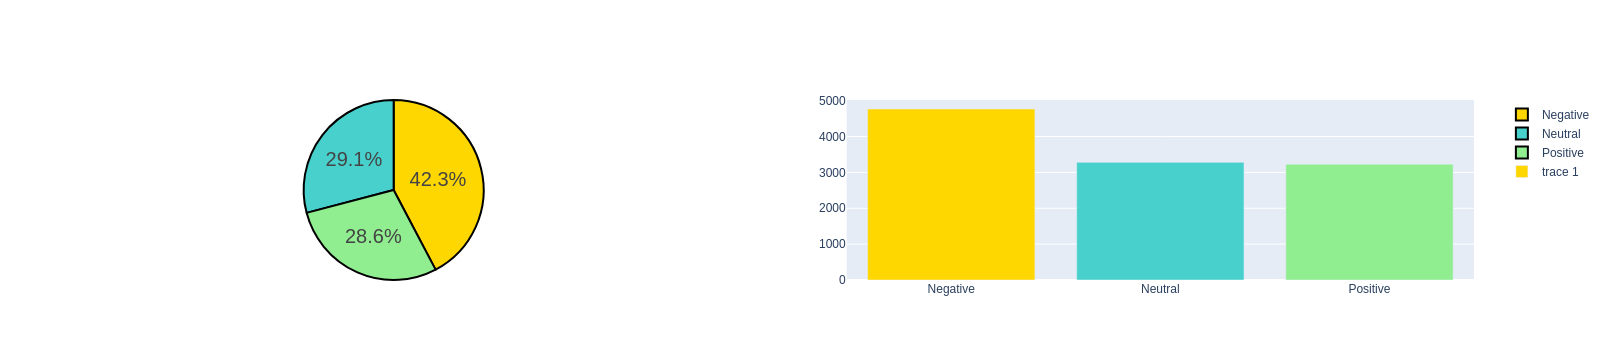

In [22]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [23]:
#Token Counts with simple tokenizer¶


In [24]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x, demoji=False))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

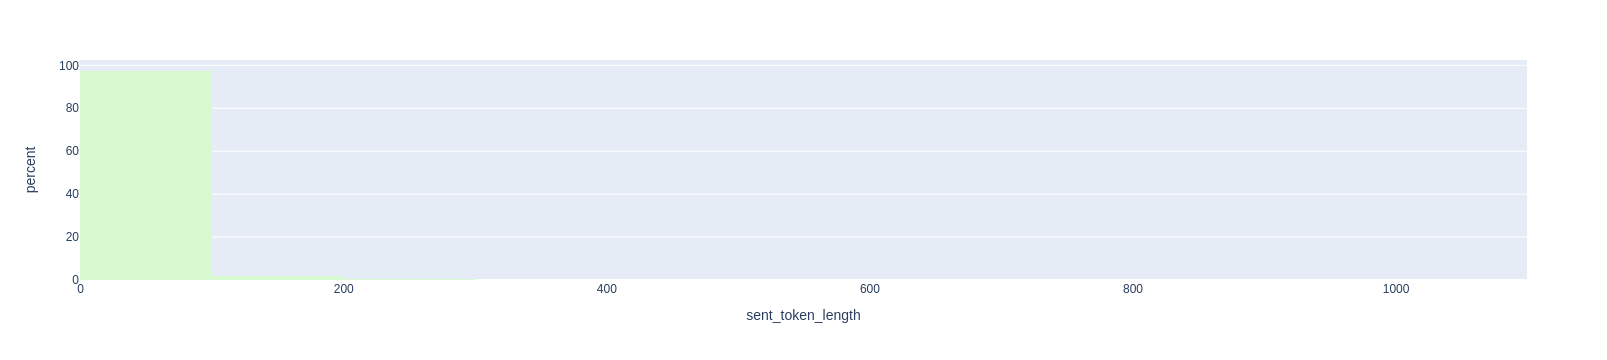

In [25]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [26]:
(df.sent_token_length < 200).mean()

0.9924618659098972

In [27]:
#Token Counts with roBERTuito tokenizer

In [28]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [29]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

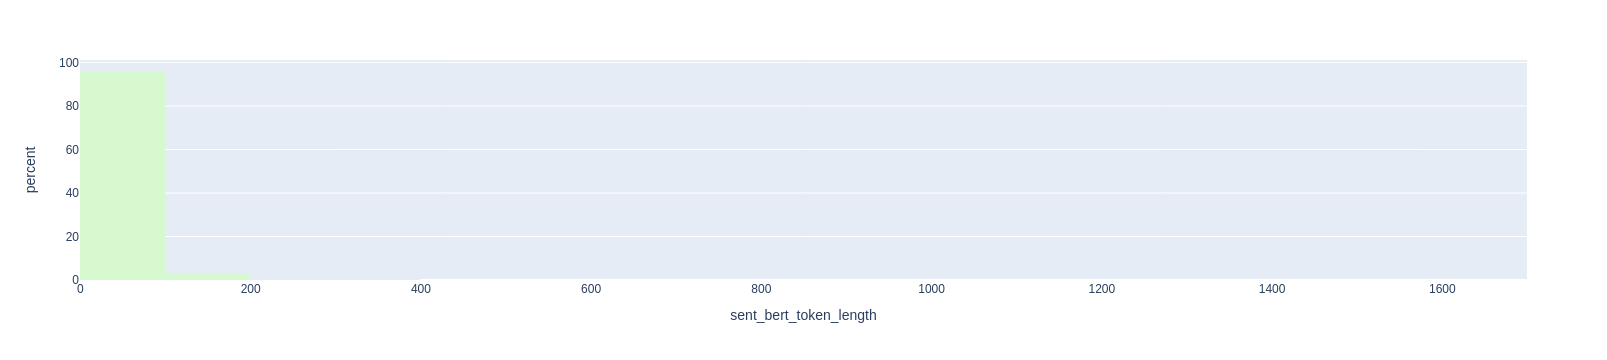

In [30]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [31]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 200).mean()

0.9898013479957432

In [32]:
#Characters Count in the Data

In [33]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

import seaborn as sns
def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

/tmp/ipykernel_8661/1990021368.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




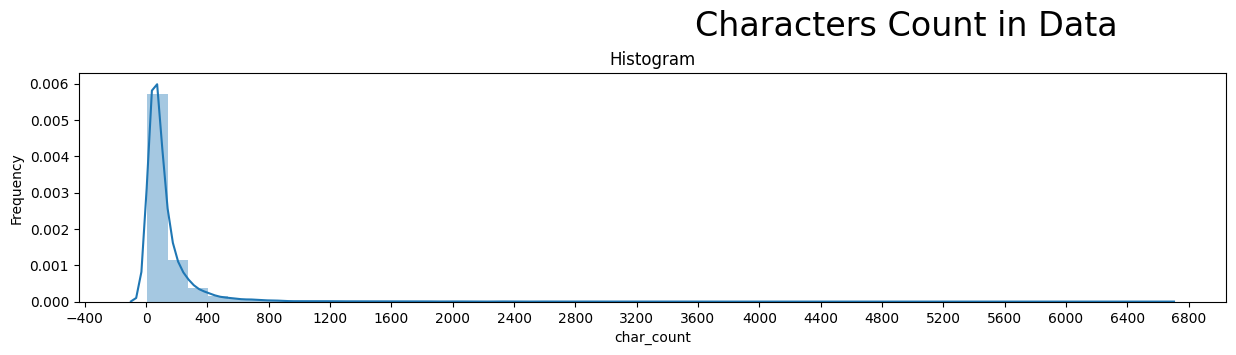

In [34]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

In [35]:
#Reviews Lengths

In [36]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

/tmp/ipykernel_8661/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_8661/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




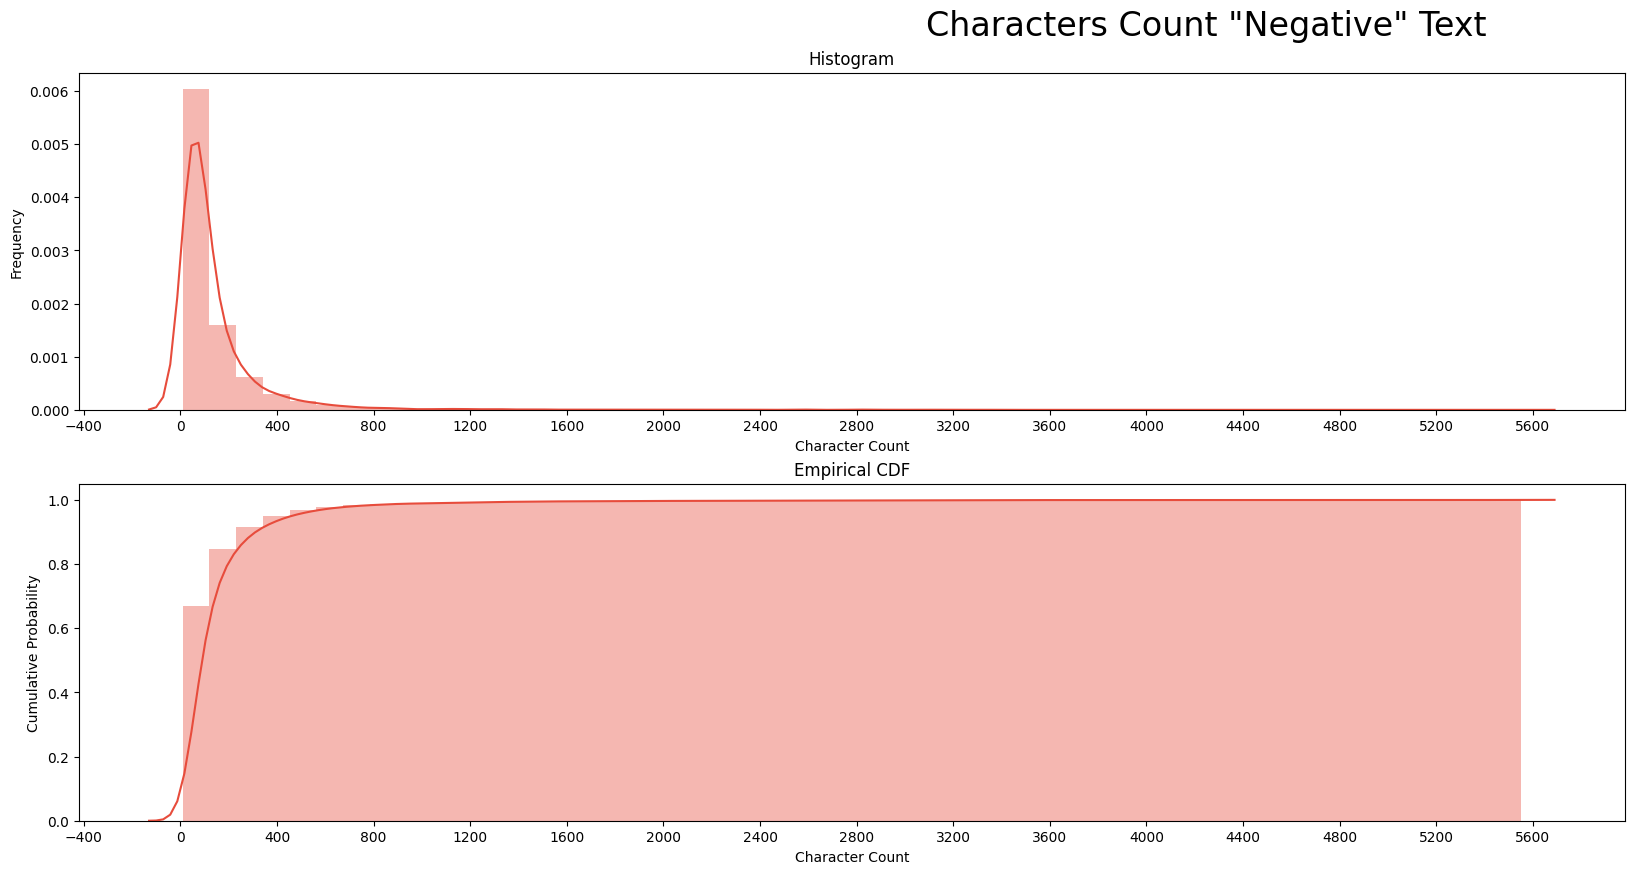

In [37]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

/tmp/ipykernel_8661/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_8661/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




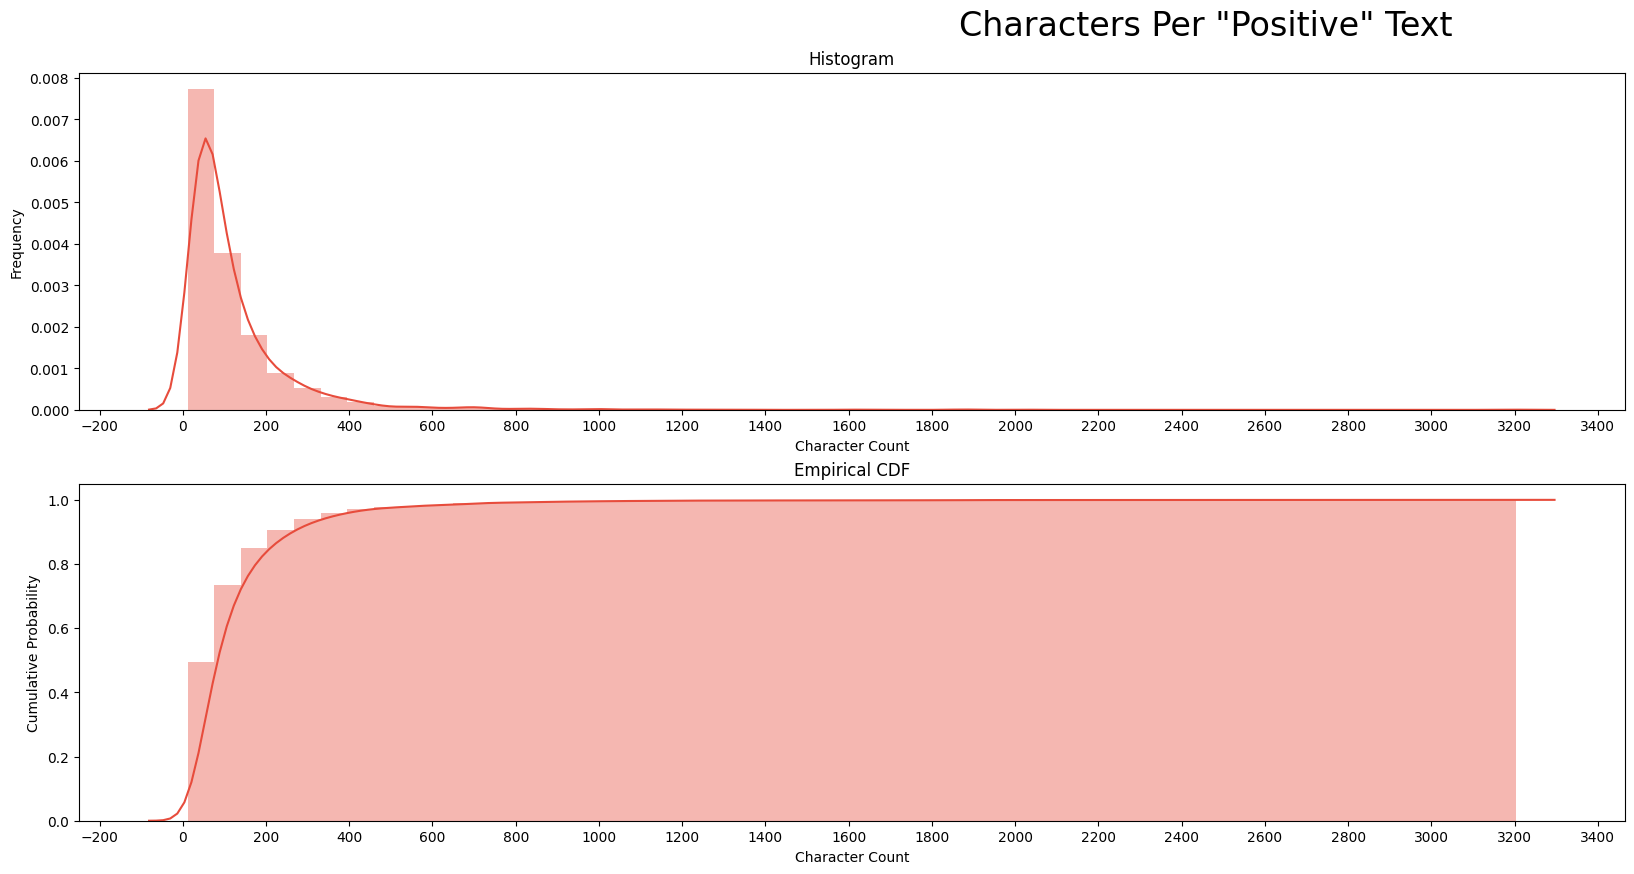

In [38]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

/tmp/ipykernel_8661/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_8661/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




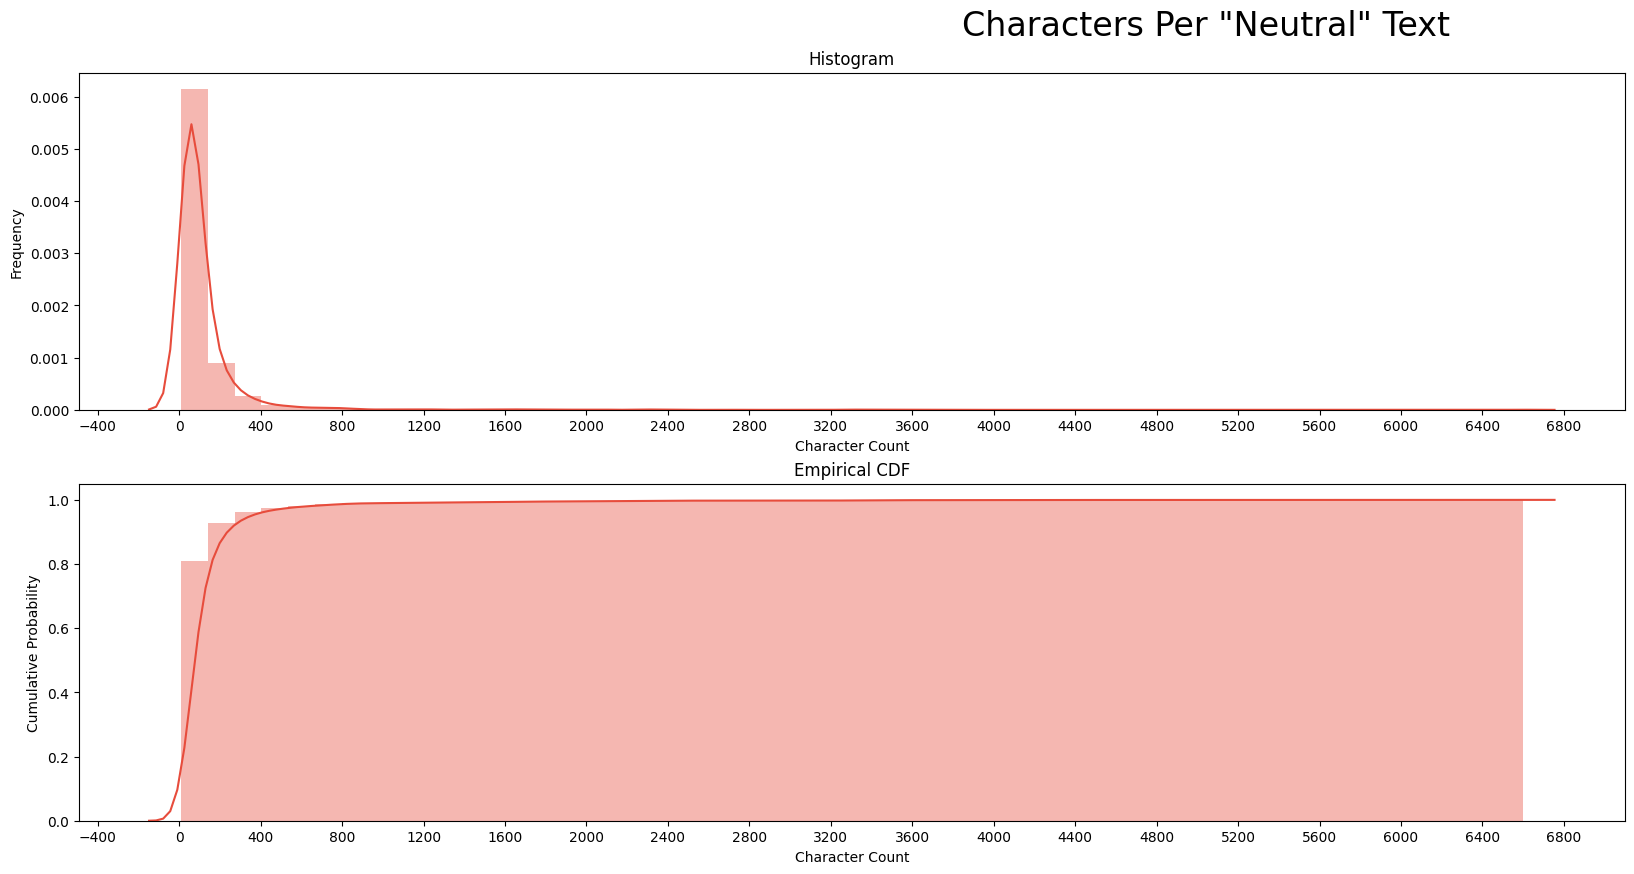

In [39]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

In [40]:
#Word Counts

In [41]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

/tmp/ipykernel_8661/1976843201.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_8661/1976843201.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_8661/1976843201.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

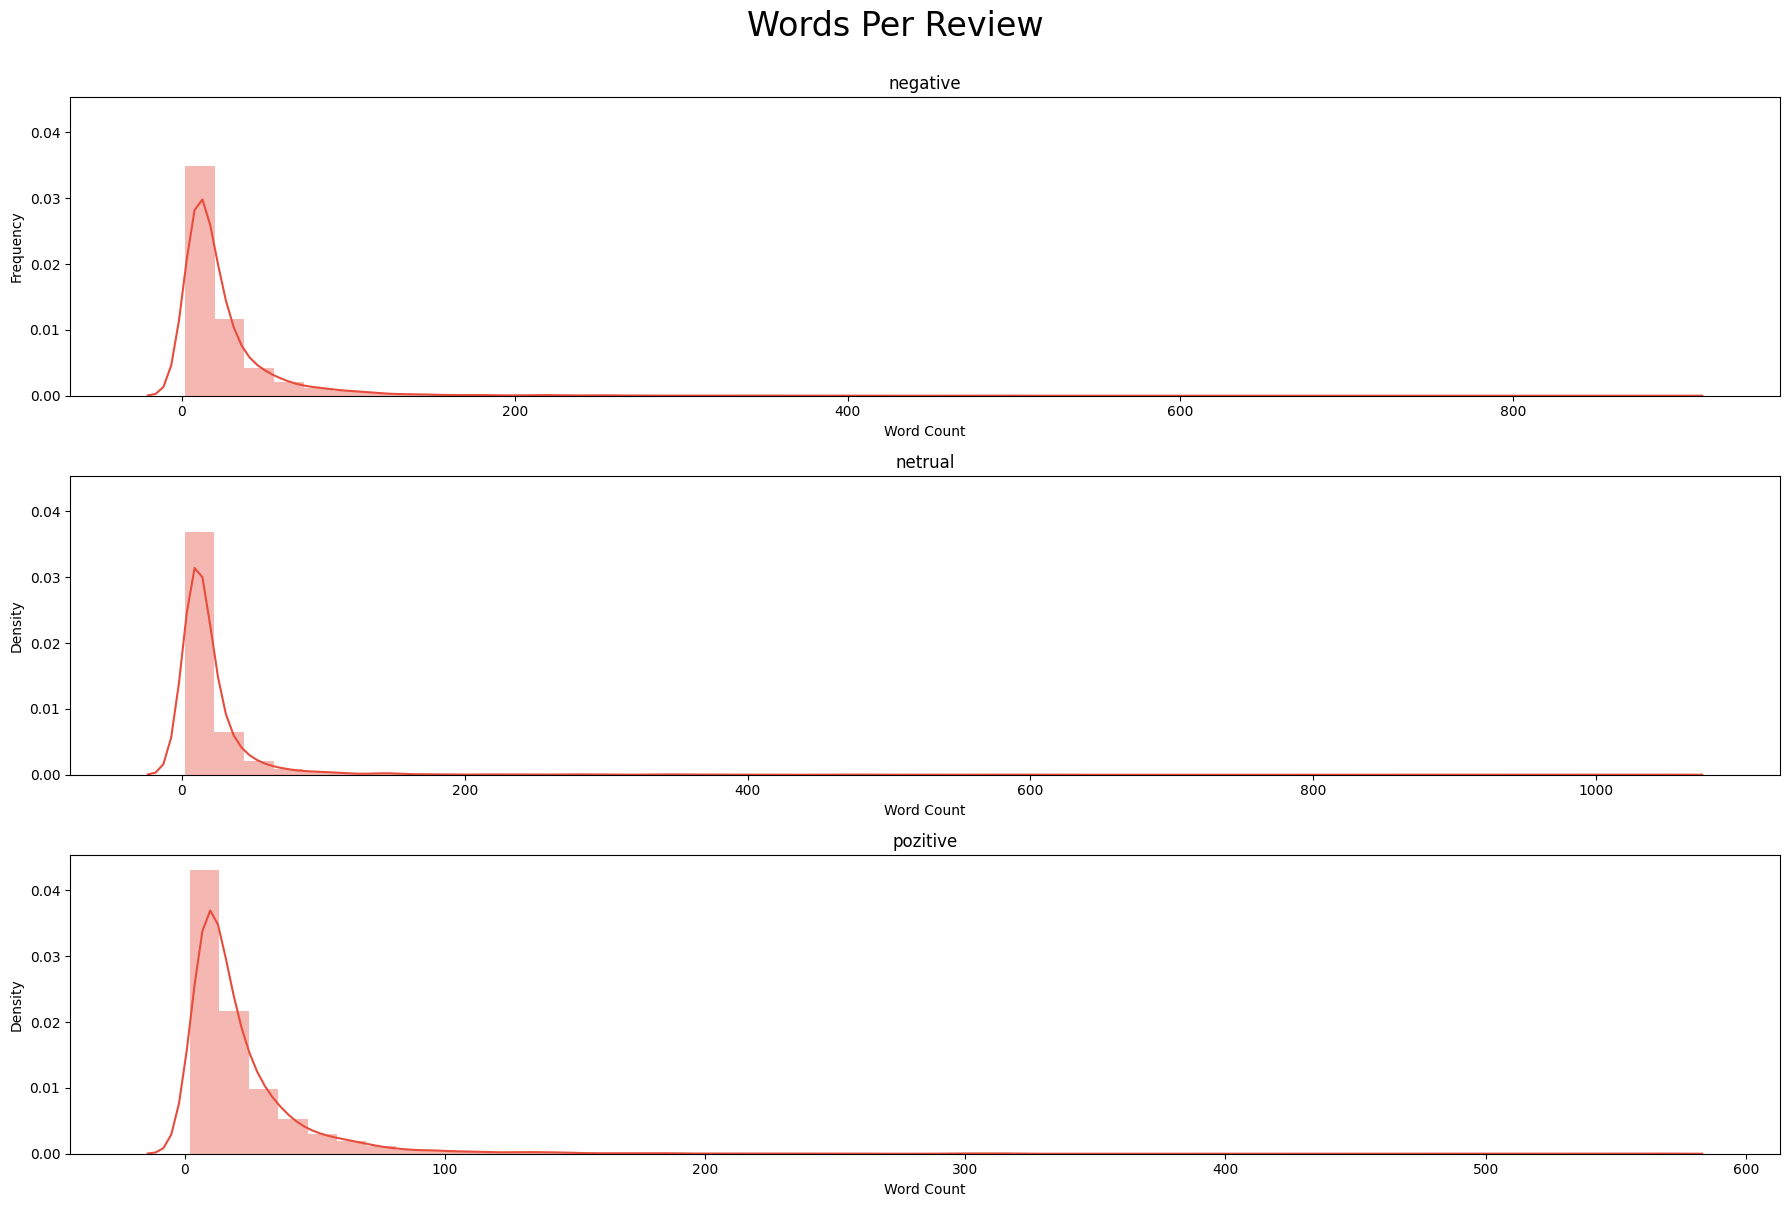

In [42]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [43]:
# remove punk 
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [44]:
df['tokenized_text'].sample(40)

7263     Que guapo  Y me decepciona la torre la imagine...
2899     Q se suban en el avion q va llevar los jugador...
5087                   mdito terruco disfraso de oveja 🐑 😤
9543     CERRÓN  BERMEJO y BELLÍDO TERRUCOS MAMERTOS HD...
1271                     El niño maltratado es la lora 🤣🤣🤣
7531     Uyy no hay como los chifas de la calle Capon  ...
6511     Brenda Nichya  increible😳 le tongue cruzando t...
3075     Aqui en yucatan hay unas que son muy famosas  ...
2993                             Te la levantan al Toque 😞
2461     Hayyy Beto    te quejas como una pajarraca  😄 ...
1196     yo fijandone en la pobre oreja no puede más co...
1474              Lesly Pamela Peña Barrena  muy buena 😂😂😂
1179                 Le falta un poco de flow peruano 😍😍😋😊
10159    Que falta de tino de los policías como lo sube...
6587                Cynthia una vaina subir la piedra  V 😱
1030     Hablaba sin parar  de cualquier cosa  y de rep...
10601    JaaaA que paso que paso  te agarro el huaico 😃.

In [45]:
pd.set_option("max_colwidth", 200)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


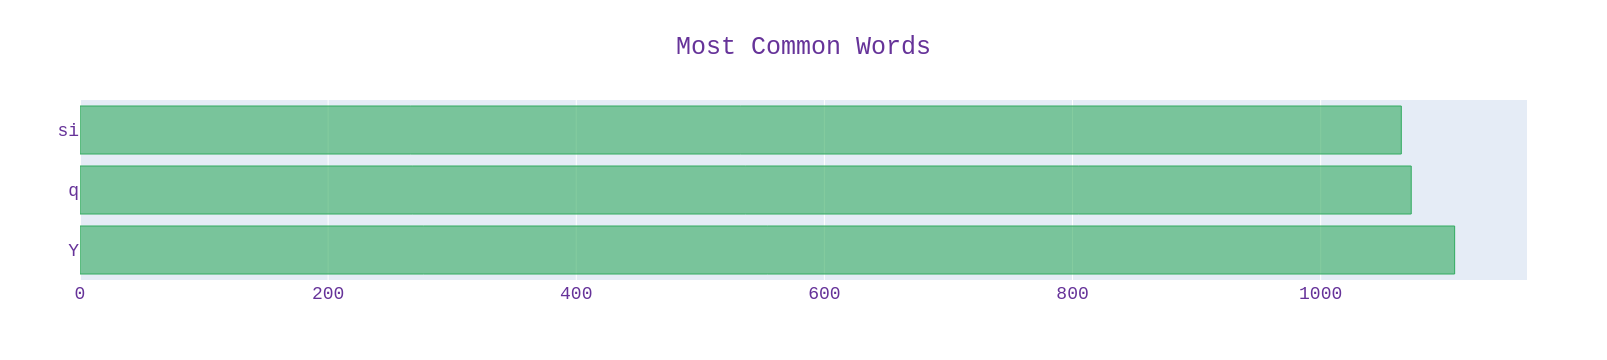

In [46]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))
# stopWords_nltk.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", 'si', 'Y'])

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

In [47]:
#Most Common ngrams

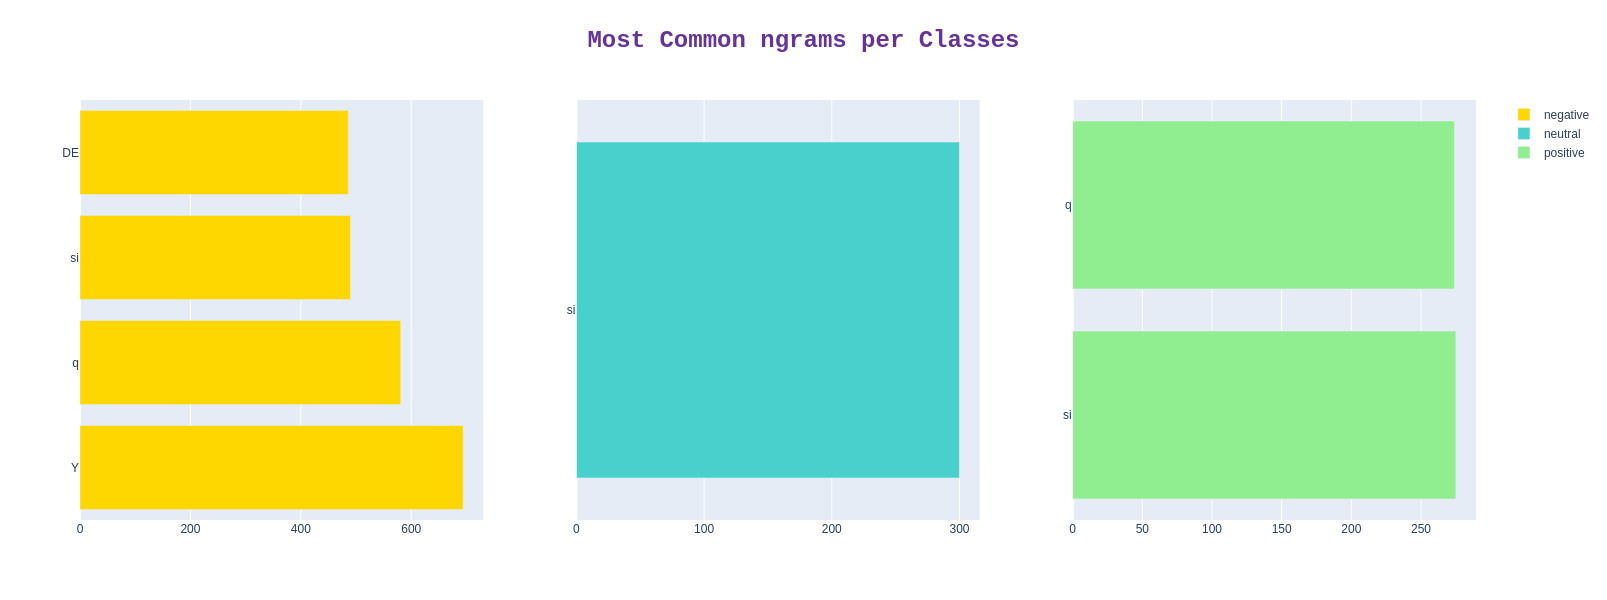

In [48]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

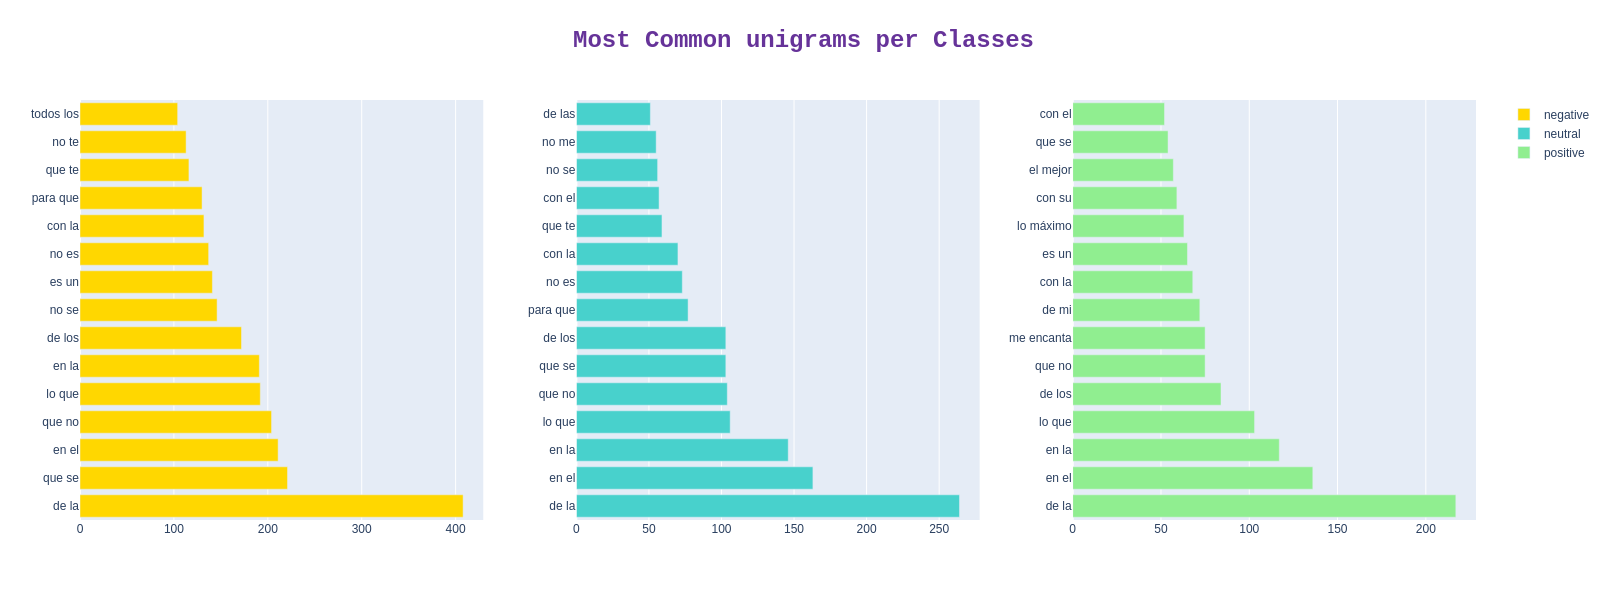

In [50]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

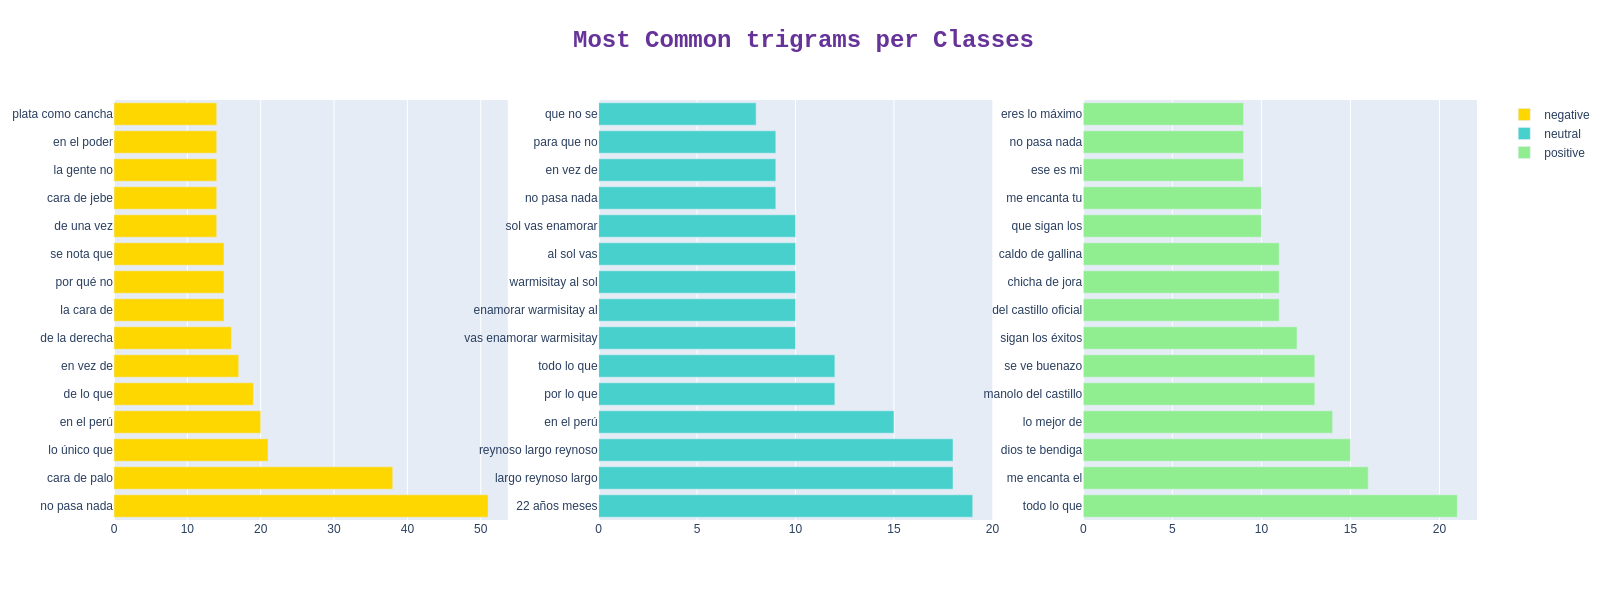

In [51]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [52]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.10, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [53]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [54]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

In [55]:
!ls -l

total 588
-rw-rw-r-- 1 darkstar darkstar  54914 Mar 17 13:35  01-build-datasets.ipynb
-rw-rw-r-- 1 darkstar darkstar  28295 Mar 19 22:04  02-pilot-eda.ipynb
-rw-rw-r-- 1 darkstar darkstar  48618 Mar 17 13:59  03-pilot-train.ipynb
-rw-rw-r-- 1 darkstar darkstar  18616 Mar 17 13:35  04-pilot-train-bertuit.ipynb
-rw-rw-r-- 1 darkstar darkstar  41023 Mar 18 00:39  04-pilot-train-beto.ipynb
-rw-rw-r-- 1 darkstar darkstar  50066 Mar 17 13:39  04-pilot-train-maria.ipynb
-rw-r--r-- 1 darkstar darkstar 263345 Mar 17 13:35  BETO_for_text_classification.ipynb
drwxrwxr-x 3 darkstar darkstar   4096 Mar 17 19:11  data
-rw-rw-r-- 1 darkstar darkstar    618 Jan  9 21:00 'Emoticon filter.ipynb'
-rw-rw-r-- 1 darkstar darkstar   2137 Dec 14 00:37 'Example multiprocessing.ipynb'
-rw-rw-r-- 1 darkstar darkstar  48082 Mar 18 00:52  Gemma-fine-tuning.ipynb
drwxrwxr-x 3 darkstar darkstar   4096 Mar 18 00:51  gemma_outputs
drwxrwxr-x 3 darkstar darkstar   4096 Mar 17 13:39  test_trainer
drwxrwxr-x 3 darkstar d

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [56]:
len(train_df)

9133

In [57]:
len(test_df)

1015

In [58]:
len(val_df)

1128

In [59]:
df.sample(n = 30)

text  \
3189                                                                                     Son un éxito chicos !  Creatividad nivel Dios 😊 Yadira Morocho Sergio Ramos Saldarriaga Sergio Jhosuath Ramos Reyes 🤗   
2155   Luciano, si regresas de todas maneras tienes que comer en Cocinería las Nievecitas, probar el queso ahumado que es buenazo para las menestras, el picaron borracho (una verdadera delicia a bajo cos...   
1666                                                                                                                                                                                Mafer Gonzalez  tú bobooo😍   
9989   CON TANTA NECECIDAD QUE SALEN DE SU PAÍS.Y NO ENTIENDO PORQUÉ ESA MALDAD CON LAS PERSONAS QUE NO TIENE CULPA DE SU DESGRACIA..ESA  IRA. ..ENTRE TODOS  LA PUEDEN UTILIZAR CONTRA SU PRESIDENTE MADUR...   
10159  Que falta de tino de los policías como lo suben como res pero sin custodio al lado debió subir también el policía .. Ahí se lanza y echa a correr agilidad del chamo para dejar en ridículo a nuestr...   
602                                                                                                                                                             Todos llevábamos la carabina lista pa disparar   
6719                                                                                                                                                                               😂😂😂 esta igual que el Huaco   
3897                                                                                                                                                                        Quería ser abogado anda huevón 🤣🤣🤣   
11235                                                                                                                                                                                Kk le hubieran tirado 🤬🤬🤬   
11123                                                                                                                                                      De esta ya no pasa la viejita 🕊️Vuela alto tía coco   
7029                                                                                                                                                             EL GORDO SE LO KIERE COMER AL CHATO 😅 AL CHUY   
1242                                     Yo perdí 2 vuelos , la primera me quede dormida y la segunda estaba full con el trabajo , me confíe y salí a las justas y llegué cuando ya el avión se había ido 😑😑😑🤣   
10153                                    Les niñes y su munda...y que dirá nuestro "ministerio de cultura" ante tantas quejas por ese premio absurdo...estaré esperando su pronunciación...le cuete ye queme 🤬   
4414                                                                                                                                                                                 Emir Obregon miércoles 😋😋   
6352                                                                                                                                               Igualito hago yo Y con el polo suavecito se trapea mejor 🤣🤣   
3309                                                                                            Ufff, que ganas de ir a Chiclayo a comer pescado fresco.. que ceviches.. ceviche de conchas negras y pulpito 🤩   
2781                                  Felicidades Manolo!!!💕💕💕 Lindo ver tus reportajes y sobretodo difundiendo nuestra cultura, lo que tanta falta hace a la población... programas que valen un Perú!!!🎉🎉️️🎉   
8649                                                                                                                                                 Jajha Valeria Small nosotras 😂😂 las cosas que hacemos xdd   
8688                                                                                                                           Que se case y que se ponga gorra, para que no le vean la pelada jijijijijijiji😛   
28